**Dynamique discrète de population**

On s’intéresse dans ce texte à la dynamique discrète d’une population structurée par classes.
Expliquons chacun des deux termes :
- dynamique discrète : La variable d’évolution (le temps) est discrète et sera notée $n \in N$ dans tout le texte. On s’intéresse donc à l’état de la population seulement à intervalles de temps réguliers (par exemple une année).
- population structurée par classes : Notre population est divisée en un nombre fini m de
classes $(C_i)_{1 \leq i \leq m}$ de sorte que chaque individu de la population étudiée entre dans une et
une seule classe.
Ainsi, à un instant $n$  donné, l’état de la population étudiée est représenté par un vecteur $x^n \in \mathbf R^m$
dont la i-ième composante $x_i^n$ est le nombre d’individus qui sont dans la classe $C_i$ à l’instant $n$.

Dans la suite, on va seulement prendre en compte deux phénomènes dans le modèle
- La fertilité : On notera $f_i \geq 0$ pour $1 \leq i \leq m$ le taux de fertilité des individus de la classe $i$. Autrement dit, un individu de cette classe aura environ $f_i$ enfants durant une année.
- La mortalité : On notera $\tau_{i+1, i}>0$ pour $1 \leq i \leq m-1$ le taux de survie des individus de la classe $i$ durant une année. La mortalité est donc donnée par $1-\tau_{i+1, i}$.
Dans ces conditions le modèle général de population s'écrit $x^{n+1}=P x^n$ où $P$ est la matrice donnée par $P=F+T$ avec
$$
F=\left(\begin{array}{cccc}
f_1 & f_2 & \cdots & f_m \\
0 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{array}\right) \quad \text { et } \quad T=\left(\begin{array}{cccc}
0 & \cdots & \cdots & 0 \\
\tau_{2,1} & 0 & \cdots & 0 \\
0 & \ddots & 0 & \vdots \\
0 & \cdots & \tau_{m, m-1} & 0
\end{array}\right) .
$$

La donnée initiale $x^0$ est bien entendu supposée positive dans toute la suite.
On va supposer que toutes les classes d'âge sont fertiles, c'est-à-dire que $\forall 1 \leq i \leq m, f_i>0$. Dans ces conditions, la matrice $P$ satisfait les hypothèses du théorème de Perron-Frobenius.

**Cor 1 :**
Soit $A \in \mathcal{M}_n(\mathbb{R})$ une matrice positive et primitive. Si $x$ est un vecteur propre positif non nul tel que $\rho(A) x \leq A x$, on a alors $A x=\rho(A) x$ et $x$ est strictement positif.

Pour toute matrice positive $B \in \mathcal{M}_n(\mathbb{K})$ telle que $B \leq A$, on a alors $\rho(B) \leq \rho(A)$.

Preuve. Si la matrice $A$ est positive primitve, il en est alors de même de sa transposée et le théorème de Perron-Frobenius nous assure l'existence d'un vecteur strictement positif $y$ tel que ${ }^t A y=\rho(A) y$ et pour tout vecteur $x$ dans $\mathbb{R}^n$, on a;
$$
{ }^t y(A x-\rho(A) x)=\rho(A){ }^t y x-\rho(A){ }^t y x=0
$$

Si de plus on suppose que $\rho(A) x \leq A x$, on a ${ }^t y(A x-\rho(A) x)=0$ avec ${ }^t y>0$ et $A x-\rho(A) x \geq 0$, ce qui équivaut à $A x-\rho(A) x=0$. Le vecteur $x$ est donc un vecteur propre positif non nul de $A$ associé à $\rho(A)$, il est donc strictement positif (théorème de Perron-Frobenius).


Pour tout $k \in \mathbb{N}$, on a $ B^k \leq A^k$. Munissant $\mathcal{M}_n(\mathbb{C})$ de la norme $N: X=\left(\left(x_{i j}\right)\right)_{1 \leq i, j \leq n} \mapsto \max _{1 \leq i, j \leq n}\left|x_{i j}\right|$, on a pour tout $k \in \mathbb{N}^*$ :
$$
N\left(B^k\right)  \leq N\left(A^k\right)
$$
et avec la croissance de $t \mapsto t^{\frac{1}{k}}$ sur $\mathbb{R}^{+}$, on en déduit que :
$$
N\left(B^k\right)^{\frac{1}{k}} \leq N\left(A^k\right)^{\frac{1}{k}}
$$
puis faisant tendre $k$ vers l'infini, il en résulte que $\rho(B) \leq \rho(A)$ (théorème de Gelfand).

In [35]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *

In [37]:
F = [0.000, 0.045, 0.391, 0.472, 0.484, 0.546, 0.511, 0.412, 0.352, 0.122, 0.088, 0.013]
T = [0.845, 0.975, 0.965, 0.950, 0.926, 0.895, 0.850, 0.786, 0.691, 0.561, 0.370]
n=len(F)
P=np.diag(T,-1)
P[0,:]=F[:]
X_0=np.random.rand(12)   
def p(N):
    L=[X_0/np.linalg.norm(X_0,1)]
    X=X_0
    for i in range(N):
        X=np.dot(P,X)
        X=X/np.linalg.norm(X,1)
        L.append(X)
    return L,X
Tx,Vx=p(30)
Y=[Vx[i]/np.linalg.norm(p(30)[1],1) for i in range(len(Vx))]
print('Vecteur des % de chaque classe est ', Y)

Vecteur des % de chaque classe est  [0.23299365741316863, 0.1696464156883083, 0.14252504303460004, 0.11851054627949889, 0.09701083989478235, 0.07740601476107864, 0.05969634708495848, 0.04372517755230046, 0.029615030191182532, 0.01763204572783539, 0.00852214230085976, 0.002716740071426444]


Valeur propre de P de module maximal est 1.1605315456599439


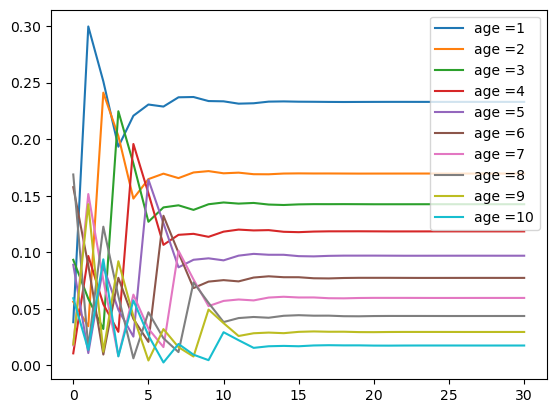

In [39]:
X,_=np.linalg.eig(P)
print('Valeur propre de P de module maximal est {}'.format(max(abs(X))))
Tx=np.array(Tx)
for i in range(10):
    plt.plot(np.arange(31),Tx[:,i],label='age ='+str(i+1))
plt.legend()
plt.show()

In [40]:
def phi(x):
    T = [0.845, 0.975, 0.965, 0.950-x, 0.926, 0.895, 0.850, 0.786, 0.691, 0.561, 0.370]
    tau=T[0]
    R=F[0]+F[1]*tau
    for i in range (1,len(T)):
        tau*=T[i]
        R+=tau*F[i+1]
    return R-1

In [41]:
x= symbols('x') 
Z = solve(Eq(phi(x), 0))
T = [0.845, 0.975, 0.965, 0.950-float(np.asarray(Z)), 0.926, 0.895, 0.850, 0.786, 0.691, 0.561, 0.370]

In [45]:
phi(0.7806268845676)

1.709743457922741e-14

Valeur propre de P de module maximal est 0.9999999999999998


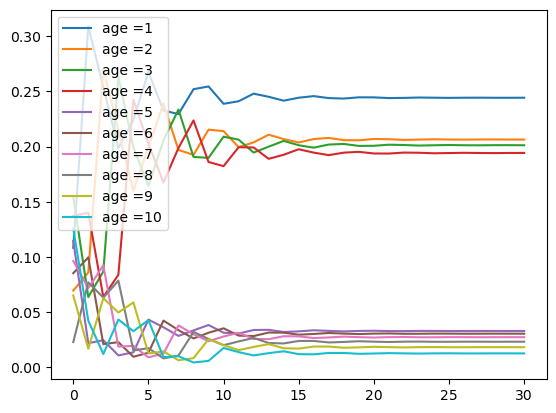

In [47]:
P=np.diag(T,-1)
P[0,:]=F[:]
X_0=np.random.rand(12)   
def p(N):
    L=[X_0/np.linalg.norm(X_0,1)]
    X=X_0
    for i in range(N):
        X=np.dot(P,X)
        X=X/np.linalg.norm(X,1)
        L.append(X)
    return L,X
X,_=np.linalg.eig(P)
Tx,_=p(30)
print('Valeur propre de P de module maximal est {}'.format(max(abs(X))))
Tx=np.array(Tx)
for i in range(10):
    plt.plot(np.arange(31),Tx[:,i],label='age ='+str(i+1))
plt.legend()
plt.show()